In [1]:
import zipfile
import os

# Specify the ZIP file path
zip_file_path = 'recipe+reviews+and+user+feedback+dataset.zip'

# Specify the extraction path (e.g., same directory)
extraction_path = './extracted_files'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract all files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)
    print("Files extracted to:", extraction_path)

# List extracted files to confirm
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)


Files extracted to: ./extracted_files
Extracted files: ['Recipe Reviews and User Feedback Dataset.csv']


In [2]:
import pandas as pd
file_path = os.path.join(extraction_path, 'Recipe Reviews and User Feedback Dataset.csv')
df = pd.read_csv(file_path)
print(df.head())


   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1     Mark467               50  1665277687      

In [3]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [5]:
df.shape

(18182, 15)

In [6]:
# Total count of missing values per column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)

print("Missing values count per column:")
print(missing_values[missing_values > 0])

print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])


Missing values count per column:
text    2
dtype: int64

Percentage of missing values per column:
text    0.01
dtype: float64


In [7]:
# Find and count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Optionally, view duplicates
# print(df[df.duplicated()])



Number of duplicate rows: 0


In [8]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)

# Convert data types if necessary (e.g., converting date columns)
# df['date_column'] = pd.to_datetime(df['date_column'], errors='coerce')



Data types of each column:
Unnamed: 0          int64
recipe_number       int64
recipe_code         int64
recipe_name        object
comment_id         object
user_id            object
user_name          object
user_reputation     int64
created_at          int64
reply_count         int64
thumbs_up           int64
thumbs_down         int64
stars               int64
best_score          int64
text               object
dtype: object


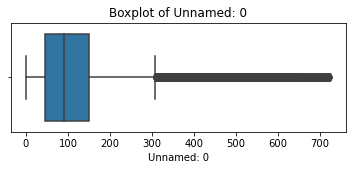

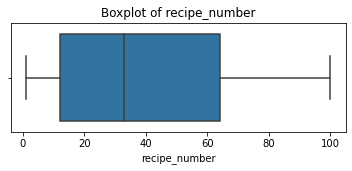

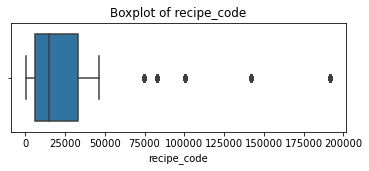

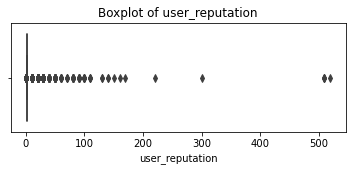

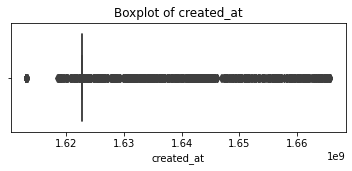

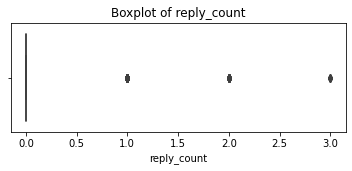

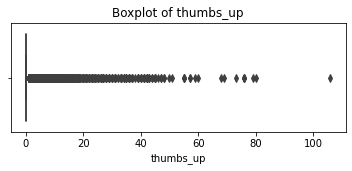

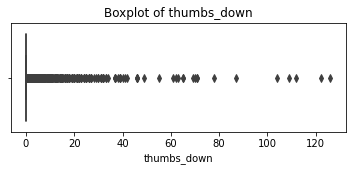

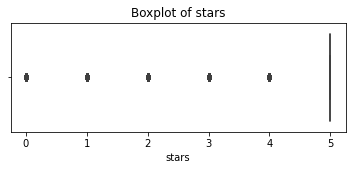

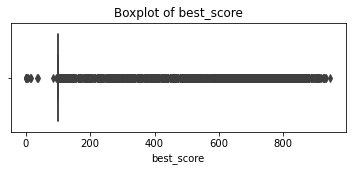

In [9]:
# For numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots to visually inspect for outliers
for col in numeric_columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [10]:
# Unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("\nUnique values per categorical column:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")



Unique values per categorical column:
recipe_name: ['Creamy White Chili' 'Best Ever Banana Bread' 'Cheeseburger Soup'
 'Amish Breakfast Casserole'
 'Pumpkin Spice Cupcakes with Cream Cheese Frosting'
 'Favorite Chicken Potpie' 'Flavorful Chicken Fajitas' 'Apple Pie'
 'Enchilada Casser-Ole!' 'Zucchini Pizza Casserole' 'Traditional Lasagna'
 'Cauliflower Soup' 'Basic Homemade Bread' 'Zucchini Cupcake'
 'Li’l Cheddar Meat Loaves' 'Rustic Italian Tortellini Soup'
 'Fluffy Key Lime Pie' 'Stuffed Pepper Soup' 'Moist Chocolate Cake'
 'Mom’s Meat Loaf' 'Pineapple Orange Cake' 'Baked Spaghetti'
 'Buttery Cornbread' 'Sandy’s Chocolate Cake' 'Baked Mushroom Chicken'
 'Hot Milk Cake' 'Macaroni Coleslaw' 'Cheesy Ham Chowder'
 'Winning Apple Crisp' 'Forgotten Jambalaya' 'Basic Banana Muffins'
 'Seafood Lasagna' 'Creamy Grape Salad' 'Peanut Butter Chocolate Dessert'
 'Flavorful Pot Roast' 'Pumpkin Bread' 'Taco Lasagna'
 'Frosted Banana Bars' 'Shrimp Scampi' 'Rhubarb Custard Bars'
 'Caramel-Pecan Che

In [11]:
print("\nSummary statistics:")
print(df.describe(include='all'))



Summary statistics:
          Unnamed: 0  recipe_number    recipe_code        recipe_name  \
count   18182.000000   18182.000000   18182.000000              18182   
unique           NaN            NaN            NaN                100   
top              NaN            NaN            NaN  Cheeseburger Soup   
freq             NaN            NaN            NaN                725   
mean      121.465295      38.689363   21773.667253                NaN   
std       116.747893      29.786647   23965.109637                NaN   
min         0.000000       1.000000     386.000000                NaN   
25%        45.000000      12.000000    6086.000000                NaN   
50%        91.000000      33.000000   14600.000000                NaN   
75%       150.000000      64.000000   33121.000000                NaN   
max       724.000000     100.000000  191775.000000                NaN   

                      comment_id                        user_id    user_name  \
count                 

In [12]:
# Fill missing 'text' values with a placeholder, like an empty string
df['text'].fillna('', inplace=True)


In [13]:
print(df.columns)


Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'comment_id', 'user_id', 'user_name', 'user_reputation', 'created_at',
       'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score',
       'text'],
      dtype='object')


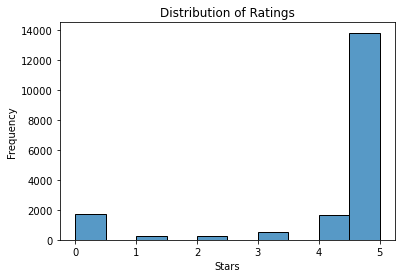

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['stars'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


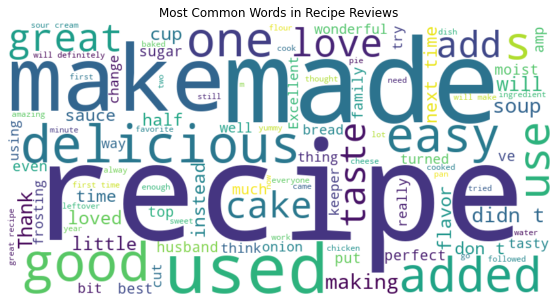

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text_data = " ".join(review for review in df['text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Recipe Reviews")
plt.show()


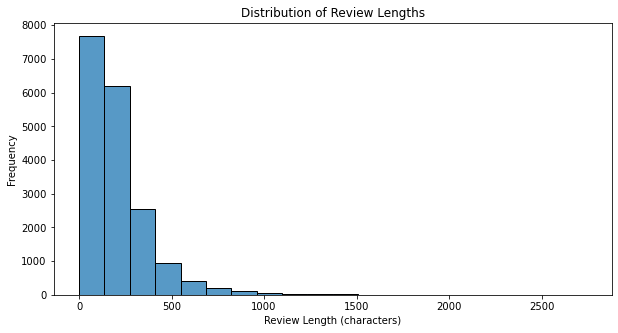

In [16]:
import seaborn as sns

# Calculate review length
df['review_length'] = df['text'].dropna().apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=20)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()


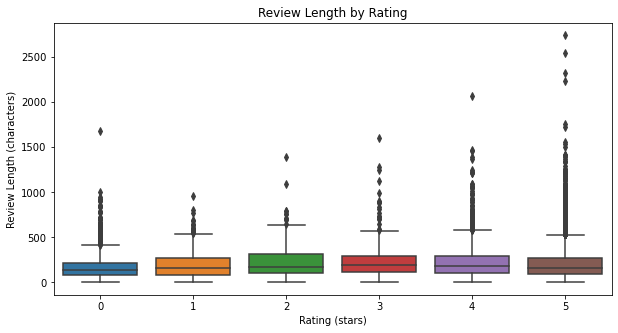

In [17]:
# Plot review length by rating
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='stars', y='review_length')
plt.title("Review Length by Rating")
plt.xlabel("Rating (stars)")
plt.ylabel("Review Length (characters)")
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF to find important words in recipe names
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['recipe_name'].dropna())

# Display top keywords (recipe categories based on common terms)
print("Top keywords across recipes:", tfidf.get_feature_names_out())


Top keywords across recipes: ['apple' 'baked' 'banana' 'bars' 'basic' 'best' 'bread' 'cake' 'casserole'
 'cheeseburger' 'chicken' 'chili' 'chocolate' 'creamy' 'lasagna' 'pie'
 'pumpkin' 'soup' 'white' 'zucchini']


In [19]:
user_avg_rating = df.groupby('user_id')['stars'].mean()
print(user_avg_rating.head())


user_id
u_05PZUpOV27Pv    5.0
u_09Pspx0F3ZKy    5.0
u_0BYS3gNJ4rI0    5.0
u_0GfixeKJgmAL    5.0
u_0HraB0BMR3qu    0.0
Name: stars, dtype: float64


In [20]:
top_rated_recipes = df[df['stars'] == df['stars'].max()]
print(top_rated_recipes[['user_id', 'recipe_name', 'stars']].head())


          user_id         recipe_name  stars
0  u_9iFLIhMa8QaG  Creamy White Chili      5
1  u_Lu6p25tmE77j  Creamy White Chili      5
2  u_s0LwgpZ8Jsqq  Creamy White Chili      5
5  u_BALTQJIvWtYr  Creamy White Chili      5
6  u_HuJVXMzQqJoI  Creamy White Chili      5


In [21]:
# Convert `created_at` to datetime if it's not already
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Extract month and year
df['review_month'] = df['created_at'].dt.month
monthly_reviews = df.groupby('review_month').size()
print(monthly_reviews)


review_month
1    18182
dtype: int64


In [22]:
user_review_counts = df.groupby('user_id').size()
print(user_review_counts.sort_values(ascending=False).head())


user_id
u_1oKVZzipo1u8lcqQzDUcw4UBn9e    25
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm    23
u_1oKVZmYPulmUFbvGiBA8U3uRR6D    23
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9    23
u_1oKVeN9YNf07RT0P9R63Yu80P5A    23
dtype: int64


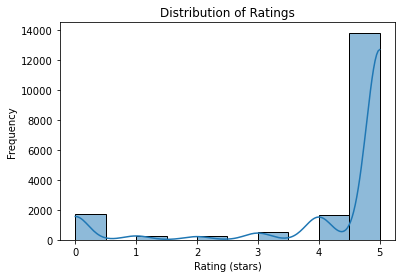

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'stars' column
if 'stars' in df.columns:
    sns.histplot(df['stars'].dropna(), bins=10, kde=True)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating (stars)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'stars' column is not available in the dataset.")


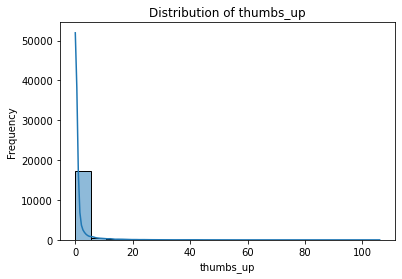

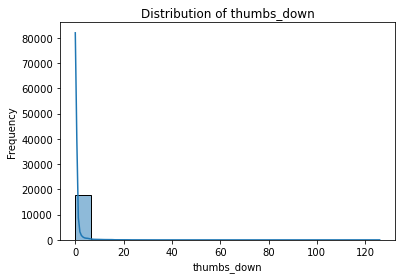

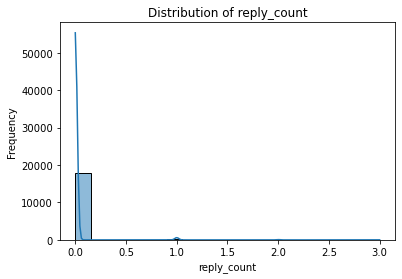

In [24]:
# Plot distributions for engagement metrics if available
engagement_columns = ['thumbs_up', 'thumbs_down', 'reply_count']

for col in engagement_columns:
    if col in df.columns:
        sns.histplot(df[col].dropna(), bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"The '{col}' column is not available in the dataset.")


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to a TF-IDF matrix to identify common terms
if 'text' in df.columns:
    tfidf = TfidfVectorizer(stop_words='english', max_features=10)  # Adjust max_features as desired
    tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
    
    # Display top keywords
    print("Top keywords across reviews:", tfidf.get_feature_names_out())
else:
    print("The 'text' column is not available in the dataset.")


Top keywords across reviews: ['39' 'added' 'delicious' 'easy' 'good' 'great' 'make' 'recipe' 'time'
 'used']


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Define tokenizer to get unigrams or bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Change to (1, 2) for bigrams
tokens = vectorizer.fit_transform(df['text'].fillna(''))


In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\b\w\b', '', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['text'].fillna('').apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BENNLANGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BENNLANGAT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most relevant words
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [29]:
!pip install vaderSentiment


In [30]:
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5)  # 5 topics as an example
topics = lda.fit_transform(tfidf_matrix)  # tfidf_matrix from previous steps
df['topic'] = np.argmax(topics, axis=1)  # Assign each recipe a primary topic

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment_score']

0        0.8881
1        0.7574
2        0.9437
3        0.0000
4        0.6114
          ...  
18177    0.4588
18178    0.5848
18179    0.9434
18180    0.5267
18181    0.9758
Name: sentiment_score, Length: 18182, dtype: float64

In [31]:
# Aggregate ratings and interactions per recipe
recipe_interactions = df.groupby('recipe_number').agg({
    'stars': 'mean',            # Average rating per recipe
    'thumbs_up': 'sum',          # Total thumbs up per recipe
    'thumbs_down': 'sum',        # Total thumbs down per recipe
    'reply_count': 'sum'         # Total replies per recipe
}).reset_index()

# Calculate engagement score
recipe_interactions['engagement_score'] = (
    recipe_interactions['thumbs_up'] - recipe_interactions['thumbs_down'] + recipe_interactions['reply_count']
)
recipe_interactions['engagement_score']

0     197
1     102
2     262
3     646
4      13
     ... 
95     10
96     13
97    184
98     81
99     95
Name: engagement_score, Length: 100, dtype: int64

In [32]:
# User-level data aggregation
user_profiles = df.groupby('user_id').agg({
    'user_reputation': 'max',   # Max reputation score per user
    'comment_id': 'count',      # Count of reviews (proxy for user activity)
    'stars': 'mean'             # Average rating given by the user
}).reset_index()

# Define reputation tier based on user reputation
bins = [0, 50, 200, np.inf]  # Example bins for user reputation
labels = ['Newcomer', 'Intermediate', 'Expert']
user_profiles['reputation_tier'] = pd.cut(user_profiles['user_reputation'], bins=bins, labels=labels)
user_profiles['reputation_tier']

0        Newcomer
1        Newcomer
2        Newcomer
3        Newcomer
4        Newcomer
           ...   
13807    Newcomer
13808    Newcomer
13809    Newcomer
13810    Newcomer
13811    Newcomer
Name: reputation_tier, Length: 13812, dtype: category
Categories (3, object): ['Newcomer' < 'Intermediate' < 'Expert']

In [33]:
import pandas as pd
import numpy as np

# Sample code to create the matrix
user_recipe_matrix = df.pivot_table(index='user_id', columns='recipe_number', values='stars', fill_value=0)
user_recipe_matrix

recipe_number,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
u_05PZUpOV27Pv,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
u_09Pspx0F3ZKy,0,0,0,0,0,0,0,0,0,5.0,...,0,0,0,0,0,0,0,0,0.0,0
u_0BYS3gNJ4rI0,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
u_0GfixeKJgmAL,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
u_0HraB0BMR3qu,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u_zUr322kk9LfN,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
u_zVEghlzoBO0t,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0
u_zoJCJGNkV5xH,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0.0,0


In [34]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Load the data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'recipe_number', 'stars']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train the SVD model
svd = SVD()
svd.fit(trainset)

# Evaluate on the test set if needed
predictions = svd.test(testset)
predictions

[Prediction(uid='u_1oKVdfNJFp2AYdbLOQ8kT9ByBAu', iid=81, r_ui=5.0, est=4.210734621771966, details={'was_impossible': False}),
 Prediction(uid='u_1oKVa2yziDed7G8u5FM8BIvl2Mj', iid=2, r_ui=5.0, est=4.6544325891937595, details={'was_impossible': False}),
 Prediction(uid='u_1oKVdxcSJm0cJxZfHGcnxyPz1He', iid=81, r_ui=5.0, est=4.201757147247745, details={'was_impossible': False}),
 Prediction(uid='u_1oKVfnWgpatmJp2bQyNNnqfYTPD', iid=79, r_ui=5.0, est=4.0030048874011, details={'was_impossible': False}),
 Prediction(uid='u_BZrdwZ3AfXoq', iid=83, r_ui=5.0, est=4.597185087971965, details={'was_impossible': False}),
 Prediction(uid='u_1oKVZlbJsKnks4yML21aFN0AsFC', iid=71, r_ui=5.0, est=4.620648209841194, details={'was_impossible': False}),
 Prediction(uid='u_1oKdYbUX82fIGl28fX2behr8uva', iid=25, r_ui=5.0, est=4.353277822952145, details={'was_impossible': False}),
 Prediction(uid='u_1oKVbyOGvXFWJx4fpzHybJJ20N3', iid=81, r_ui=5.0, est=4.3136920093982125, details={'was_impossible': False}),
 Predict

In [35]:
# Use an actual user ID from the matrix
user_id = user_recipe_matrix.index[0]  # Selecting the first user ID as an example

# Now proceed with the recommendation code
user_ratings = user_recipe_matrix.loc[user_id]
unrated_recipes = user_ratings[user_ratings == 0].index  # Recipes user hasn't rated


In [36]:
recommendations = []
for recipe_id in unrated_recipes:
    estimated_rating = svd.predict(user_id, recipe_id).est
    recommendations.append((recipe_id, estimated_rating))

In [37]:
# Sort recommendations by estimated rating
recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
top_recommendations = recommendations[:10]  # Top 10 recommendations

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
user_similarity = cosine_similarity(user_recipe_matrix)
recipe_similarity = cosine_similarity(user_recipe_matrix.T)


In [39]:
def recommend_similar_users(user_id, top_n=5):
    # Find top N similar users
    user_idx = user_recipe_matrix.index.get_loc(user_id)
    similarity_scores = list(enumerate(user_similarity[user_idx]))
    similar_users = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    # Aggregate their top-rated recipes
    recommendations = {}
    for user, score in similar_users:
        similar_user_id = user_recipe_matrix.index[user]
        top_rated_recipes = user_recipe_matrix.loc[similar_user_id].sort_values(ascending=False)
        for recipe, rating in top_rated_recipes.items():
            if recipe not in recommendations:
                recommendations[recipe] = rating * score
            else:
                recommendations[recipe] += rating * score

    # Return recipes with the highest aggregated scores
    top_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:10]
    return top_recommendations
top_recommendations

[(18, 4.871511700583665),
 (96, 4.818282395638135),
 (100, 4.770718455925949),
 (76, 4.72693872247544),
 (71, 4.725257061296488),
 (44, 4.724526690077063),
 (3, 4.721155503290786),
 (28, 4.702955228656025),
 (38, 4.679967480237247),
 (23, 4.657078155056588)]

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Using TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])  # Assuming 'text' is the column with recipe details


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [42]:
def get_recommendations(recipe_index, cosine_sim=cosine_sim):
    # Get similarity scores for the given recipe
    sim_scores = list(enumerate(cosine_sim[recipe_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get indices of top recipes (excluding the target recipe itself)
    top_recipe_indices = [i[0] for i in sim_scores[1:6]]
    return df['recipe_name'].iloc[top_recipe_indices]  # Return names of similar recipes


In [43]:
df['average_rating'] = df.groupby('recipe_name')['stars'].transform('mean')
df['thumbs_up_count'] = df.groupby('recipe_name')['thumbs_up'].transform('sum')


In [44]:
popular_recipes = df[['recipe_name', 'average_rating', 'thumbs_up_count']].drop_duplicates()
popular_recipes = popular_recipes.sort_values(by=['average_rating', 'thumbs_up_count'], ascending=False)
top_popular_recipes = popular_recipes.head(5)  # Get top 5 popular recipes


In [45]:
# Example weights
collaborative_weight = 0.6
content_weight = 0.4

def hybrid_score(user_id, recipe_id, collab_scores, content_scores):
    # Assuming 'collab_scores' is a dictionary of collaborative filtering scores
    # and 'content_scores' is a dictionary of content similarity scores
    collab_score = collab_scores.get((user_id, recipe_id), 0)
    content_score = content_scores.get(recipe_id, 0)
    
    # Weighted average
    final_score = (collaborative_weight * collab_score) + (content_weight * content_score)
    return final_score


In [ ]:
def personalized_hybrid_score(user_id, recipe_id, collab_scores, content_scores, user_history_count):
    # Example logic: weight shifts based on user interaction count
    collab_weight = 0.8 if user_history_count > 10 else 0.3
    content_weight = 1 - collab_weight
    
    collab_score = collab_scores.get((user_id, recipe_id), 0)
    content_score = content_scores.get(recipe_id, 0)
    
    return (collab_weight * collab_score) + (content_weight * content_score)


In [ ]:
from sklearn.model_selection import train_test_split

# Example: Splitting user-recipe ratings data
train_data, test_data = train_test_split(user_recipe_data, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example of MSE and MAE for collaborative filtering or hybrid models
predictions = model.predict(test_data)  # Replace 'model' with your collaborative or hybrid model
mse = mean_squared_error(test_data['actual_ratings'], predictions)
mae = mean_absolute_error(test_data['actual_ratings'], predictions)

print(f"MSE: {mse}, MAE: {mae}")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for optimal parameters in a collaborative filtering model (e.g., SVD)
param_grid = {'n_factors': [20, 50, 100], 'reg_all': [0.02, 0.1, 0.2]}
grid_search = GridSearchCV(SVD(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_data)

print(f"Best parameters: {grid_search.best_params_}")
